## MNIST 使用
MNIST is a computer vision dataset. It consists of black and white images from zero to nine. Each image is 28 * 28. Also, it includes labels for each image, telling us which digit it is.

![Alt text](./images/dnn_implement/Selection_017.png)
![Alt text](./images/dnn_implement/Selection_018.png)


In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]


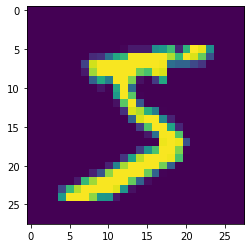

In [2]:
plt.figure()
plt.imshow(x_train[0])

plt.show()

In [2]:
x_train = x_train.reshape([x_train.shape[0], 28*28])
x_test = x_test.reshape([x_test.shape[0], 28*28])
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


# 建立DNN網路模型(keras)
Keras產生DNN的寫法

In [8]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 初始化每一層的weight and bias
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=1)
initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=1)

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(784,)),  # 784 * 32 + 32 = 25120
    layers.Dense(64, activation='relu'), # 32 * 64 + 64 = 2112
#    layers.Dense(64, activation='relu', kernel_initializer=initializer, bias_initializer=initializer),
    layers.Dense(10, activation='softmax')
])


'''
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
'''

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('print layer1 weights:')
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])
print('print layer1 bias:')
print(model.layers[0].weights[1].shape)
print(model.layers[0].weights[1])



print layer1 weights:
(784, 32)
<tf.Variable 'dense/kernel:0' shape=(784, 32) dtype=float32, numpy=
array([[ 0.06304456, -0.03081895, -0.03522585, ...,  0.03094558,
        -0.05021991,  0.05623629],
       [-0.01084306, -0.04016816, -0.08133246, ..., -0.01093137,
         0.01771715, -0.00773857],
       [-0.03557955, -0.04812775, -0.05601905, ...,  0.04703157,
         0.02833052, -0.0647322 ],
       ...,
       [-0.02646298,  0.01623353,  0.07820474, ..., -0.00779957,
         0.04880919,  0.06280675],
       [-0.06045065,  0.08513375,  0.01628912, ...,  0.0309859 ,
         0.08469874,  0.01522064],
       [ 0.00294255,  0.08057817,  0.05965958, ...,  0.06926911,
        -0.06268469,  0.02076287]], dtype=float32)>
print layer1 bias:
(32,)
<tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>


In [7]:
print('print layer2 weights:')
print(model.layers[1].weights[0].shape)
print(model.layers[1].weights[0])
print('print layer2 bias:')
print(model.layers[1].weights[1].shape)
print(model.layers[1].weights[1])

print layer2 weights:
(1, 32)
<tf.Variable 'hidden1/kernel:0' shape=(1, 32) dtype=float32, numpy=
array([[-0.30262387, -0.22843538,  0.1718741 , -0.11753979,  0.05468857,
         0.19140345, -0.30980945, -0.1874424 ,  0.23347956, -0.15596032,
         0.27600586,  0.40879035, -0.28727514,  0.13870525,  0.23271477,
        -0.4082627 ,  0.20746142,  0.23282605, -0.42500582,  0.11801529,
        -0.24714546,  0.24695426, -0.03640985, -0.1842062 , -0.06171352,
        -0.28329465, -0.29629773,  0.21348202,  0.4165088 , -0.01682699,
        -0.13150796,  0.1728763 ]], dtype=float32)>
print layer2 bias:
(32,)
<tf.Variable 'hidden1/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>
